In [1]:
import numpy as np
import matplotlib.pyplot as plt
%autosave 120
%pylab inline

Autosaving every 120 seconds
Populating the interactive namespace from numpy and matplotlib


## Loading images into memory maps

It is recommended to load large files into memory maps. Memory-mapped files only load a
small part of large files. NumPy memory maps are array-like. In this example, we will generate
an image of colored squares and load it into a memory map.

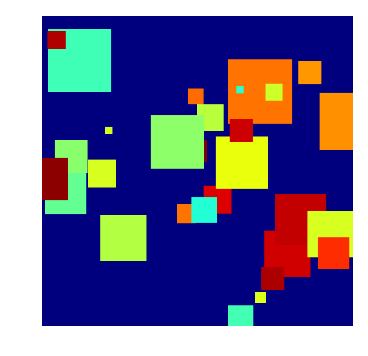

In [2]:
N = 512
NSQUARES = 30

# Initialize
img = np.zeros((N, N), np.uint8)
centers = np.random.randint(0, N, size=(NSQUARES, 2))
radii = np.random.randint(0, N/9, size=NSQUARES)
colors = np.random.randint(100, 255, size=NSQUARES)

# Generate squares
for i in xrange(NSQUARES):
    xindices = range(centers[i][0] - radii[i], centers[i][0] + radii[i])
    xindices = np.clip(xindices, 0, N - 1)
    
    yindices = range(centers[i][1] - radii[i], centers[i][1] + radii[i])
    yindices = np.clip(yindices, 0, N - 1)
    
    if len(xindices) == 0 or len(yindices) == 0:
        continue
        
    coordinates = np.meshgrid(xindices, yindices)
    img[coordinates] = colors[i]
    
# Load into memory map
img.tofile('random_squares.raw')
img_memmap = np.memmap('random_squares.raw', shape= img.shape)

plt.imshow(img_memmap)
plt.axis('off')
plt.show()
    
    
    
    


## Combining Images

In [8]:
import scipy.misc

In [13]:
ITERATIONS = 10
ascent = scipy.misc.ascent()
SIZE = ascent.shape[0]
MAX_COLOR = 255.
x_min, x_max = -2.5, 1
y_min, y_max = -1, 1

# Initialize arrays
x, y = np.meshgrid(np.linspace(x_min, x_max, SIZE),
                    np.linspace(y_min, y_max, SIZE))
c = x + 1j * y

z = c.copy()

fractal = np.zeros(z.shape, dtype=np.uint8) + MAX_COLOR

In [17]:
# Generate fractal
for n in range(ITERATIONS):
    mask = np.abs(z) <= 4
    z[mask] = z[mask] ** 2 + c[mask]
    fractal[(fractal == MAX_COLOR) & (~mask)] = (MAX_COLOR - 1) * n / ITERATIONS

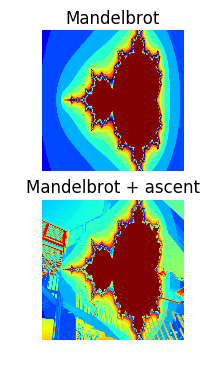

In [20]:
# Dispaly the fractal
plt.subplot(211)
plt.imshow(fractal)
plt.title('Mandelbrot')
plt.axis('off')


# Combine with ascent
plt.subplot(212)
plt.imshow(np.choose(fractal < ascent, [fractal, ascent]))
plt.axis('off')
plt.title('Mandelbrot + ascent')
plt.show()